In [1]:
from sympy import solve
from sympy import Symbol
from math import cos, sin, pi, sqrt, tan, fabs
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

%matplotlib inline


def majoraxis(A, B, C, D, E):
    return (((A*E**2 - B*D*E + C*D**2)/(4*A*C-B**2))/(A+C - sqrt((A-C)**2 + B**2)))
def minoraxis(A, B, C, D, E):
    return (((A*E**2 - B*D*E + C*D**2)/(4*A*C-B**2))/(A+C + sqrt((A-C)**2 + B**2)))


hmin:6.41629436929793, t:0.7853881633974483, al:0.7070967811865476, m:1
Len:0
alpha=0.7070967811865476, m=1
0.4999858579643764 <= 0.5
1 <= 1.8284671253118832
a^2:9.0
b^2:3.999999999999999
h:6.578166169210487
be:-1.8582218480388817
(4.651400124358978, 4.651400124358978)
(6.578166169210487, 0)
2.1557009821925623x^2+-1xy+4.520923402231673y^2+-14.180559271992932x+-12.223692095657162y=0


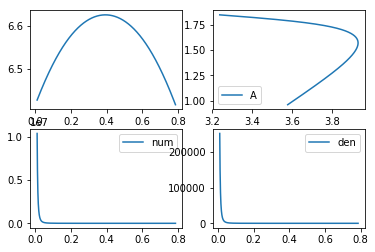

hmin:3.468448307628805, t:0.7853881633974483, al:0.4, m:1
Len:0
alpha=0.4, m=1
0.16000000000000003 <= 0.5
1 <= 3.999999999999999
a^2:1.69
b^2:1.4399999999999997
h:3.638061762248729
be:2.4324402243262657
(1.4552247048994917, 1.4552247048994917)
(3.638061762248729, 0)
14.892645961709551x^2+-1xy+17.25786838174866y^2+-54.180365812003465x+8.849367769077109y=0


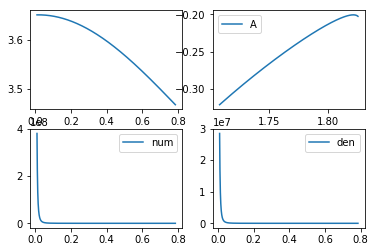

hmin:0.0011265906773423884, t:0.7853881633974483, al:0.3, m:0.001
Len:0
alpha=0.3, m=0.001
0.09 <= 0.9999990000010001
1e-06 <= 5.666666666666667
a^2:99.99999999999999
b^2:0.9999999999999923
h:0.03725089623108194
be:89.40486284373038
(0.011175268869324581, 1.1175268869324581e-05)
(0.03725089623108194, 0)
0.12729372942653605x^2+-1xy+2.4925161494656463y^2+-0.004741805505735316x+3.3304112683459137y=0


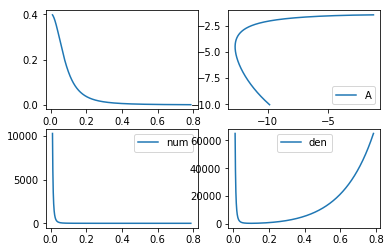

In [3]:
def g(a, b, al, m):
    q = a**2 / b**2
    w = (a**2-b**2)/(a**2+b**2)
    #print(q, w)
    
    def printeq(A, B, C, D, E):
        if (fabs(A+C - sqrt((A-C)**2 + B**2)) < 1e-5):
            return 0
        
        print(f"a^2:{majoraxis(A,B,C,D,E)}")
        print(f"b^2:{minoraxis(A,B,C,D,E)}")        
        h = getH(A, B, C, D, E)
        print(f"h:{h}")

        be = (-A*(al-1) + al * m - C * m**2*al)/m
        print(f"be:{be}")
        print(f"({h * al}, {h * al * m})")
        print(f"({h}, 0)")

        print(f"{A}x^2+{B}xy+{C}y^2+{D}x+{E}y=0")
        
    def getCx(A, B, C, D, E):
        return (B*E - 2 * C * D)/(4 * A * C - B**2)
        
    def getCy(A, B, C, D, E):
        return (B * D - 2 * A * E)/(4 * A * C - B**2)
        
    def getDs(A, B, C, D, E):
        return (A+C - sqrt((A-C)**2 + B**2))
    
    def getDen(A, B, C, D, E):
        H = (4*A*C-B**2)*(A+C - sqrt((A-C)**2 + B**2))
        be = (-A*(al-1) + al * m - C * m**2*al)/m
        return A * be**2 - A * be + C * A**2
    
    def getNum(A, B, C, D, E):
        return a**2*(4*A*C-B**2)*(A+C - sqrt((A-C)**2 + B**2))

    
    def getH(A, B, C, D, E):
        H = (4*A*C-B**2)*(A+C - sqrt((A-C)**2 + B**2))
        be = (-A*(al-1) + al * m - C * m**2*al)/m
        
        if (fabs(A * be**2 - A * be + C * A**2) < 1e-5):
            return 0
        return sqrt((a**2*H)/(A * be**2 - A * be + C * A**2))
    
    def f1(t):
        t = tan(2*t)
        A = (-w + sqrt(t**2+1))/(2*t*w)
        #A = (-C*w**2 - C + sqrt(4*C**2*w**2 + w**2-1))/(w**2-1)
        C = A + 1/t
        return eq(A,C)
        
    def f2(A):
        C = (-A*w**2 -A - sqrt(4*A**2*w**2 + w**2 - 1))/(w**2 - 1)
        return eq(A, C)
    
    def eq(A, C):
        B = -1
        #C = (w + sqrt(t**2+1))/(2*t*w)
        #A = (-C*w**2 - C + sqrt(4*C**2*w**2 + w**2-1))/(w**2-1)
        #A = C - 1/t
        #A = t
        if (4*A**2*w**2 + w**2 - 1 < 0):
            return (0,0,0,0,0)
        
        #C = (-A*w**2 -A - sqrt(4*A**2*w**2 + w**2 - 1))/(w**2 - 1)
        
        H = (4*A*C-B**2)*(A+C - sqrt((A-C)**2 + B**2))
        be = (-A*(al-1) + al * m - C * m**2*al)/m
        
        if (fabs(A * be**2 - A * be + C * A**2) < 1e-5):
            return (0,0,0,0,0)
        
        h = sqrt((a**2*H)/(A * be**2 - A * be + C * A**2))
        D = -A * h
        E = h * be
        #print(f"({h * al}, {h * al * m})")
        #print(f"({h}, 0)")
        #print(f"{A}x^2+{B}xy+{C}y^2+{D}x+{E}y=0")
        return A, B, C, D, E
    
    #print(sqrt((1-w**2)/(4*w**2)), 1/(2*w))
    arr2 = np.linspace(max(sqrt((1-w**2)/(4*w**2)), 1/(2*w)), max(sqrt((1-w**2)/(4*w**2)), 1/(2*w)) + 5.5, 4000)
    arr = np.linspace(0.01, pi/4-0.00001, 2000)
    
    #xx = [tan(2*x) for x in arr]
    
    hh = []
    hmin = 1e10
    tmin = 1
    
    for x in arr:
        hx = getH(*f1(x))
        if (hx < hmin):
            hmin = min(hx, hmin)
            tmin = x
            
        if fabs(70 - getH(*f1(x))) < 1e-3:
            hh.append(x)
    
    print(f"hmin:{hmin}, t:{tmin}, al:{al}, m:{m}")
    print(f"Len:{len(hh)}")
    ux = 1/(al**2*(1+m**2))
    print(f"alpha={al}, m={m}")
    print(f"{al**2} <= {1/(1+m**2)}")
    print(f"{m**2} <= {(1-(1-al)**2)/(al**2)}")
    for x in hh:
        print(f"x={x}")
        printeq(*f1(x))
        print("-------")
    
    y = [getH(*f1(x)) for x in arr]
    
    plt.tight_layout()
    plt.subplot(221)
    plt.plot(arr, y)
    
    plt.subplot(222)

    printeq(*f1(0.2))
    
    y = [getCy(*f1(x)) for x in arr]
    xs = [getCx(*f1(x)) for x in arr]
    
    plt.plot(xs, y, label='A')
    plt.legend()
    
    plt.subplot(223)
    y = [getNum(*f1(x)) for x in arr]
    plt.plot(arr, y, label='num')
    #y = [getDen(*f1(x)) for x in arr]
    #plt.plot(arr, y, label='den')
    plt.legend()

    plt.subplot(224)
    y = [getDen(*f1(x)) for x in arr]
    plt.plot(arr, y, label='den')
    plt.legend()
    
    plt.show()

g(3, 2, sqrt(1/(1+1)) - 0.00001, 1)
g(1.3, 1.2, 0.4, 1)
g(10, 1, 0.3, 0.001)